## Heisenberg uncertainty principle

#### Big question: In the quantum world, how precisely are we able to measure the position, momentum, and energy of a particle?

Much (not all) of classical physics is deterministic. For example, the gravitational two-body problem has an analytical solution, as does a car's velocity as a function of time when its initial velocity and acceleration are known. Classical exceptions to determinism are many-body gravitational dynamics and turbulence. In fact, <bf>Werner Heisenberg</bf>, Nobel Prize winner in 1932 for his contributions to quantum mechanics, said that if he were allowed to ask God two questions, they would be "Why quantum mechanics?" and "Why turbulence?"

As we have learned, the quantum world is fundamentally different than the classical world. In the quantum world, <em>nothing</em> is deterministic. The wave treatment encapsulates the idea that we can't predict exactly where a particle will be at any given time; we can only give the <em>probability</em> of its being between points $x_1$ and $x_2$.

#### Why isn't a delta function a valid wave function?

Remember we talked about how you can add together many individual sinusoids to create a compound wave function. It turns out there is a way to create a delta function out of an infinite sum of individual waves:
<ul>
    <li>Set up an infinite collection of sinusoids that includes every frequency from $-\infty$ to $\infty$ (negative frequencies describe waves traveling to the left on the x-axis)</li>
    <li>Make the wave <em>envelope</em> a sinusoid, i.e. the amplitudes of the sinusoids in the collection are given by a sinusoid</li>
</ul>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':16, 'axes.labelsize':16})

Text(0, 0.5, '$\\psi(x)$')

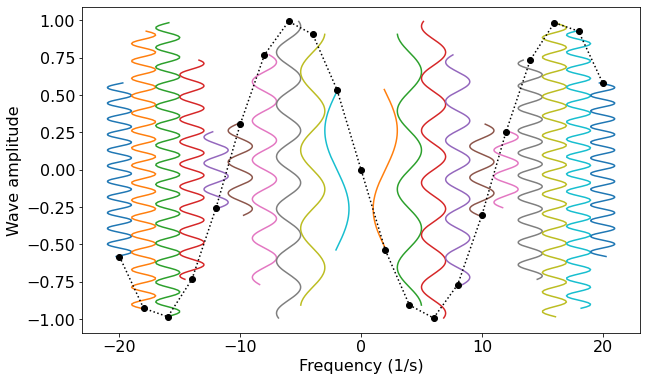

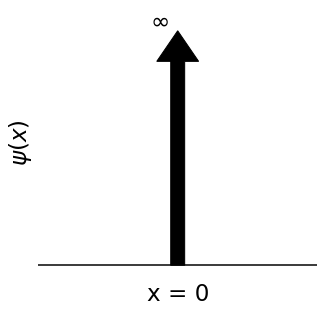

In [2]:
viz_freqs = np.linspace(-20, 20, num=21, endpoint=True) # Cycle frequencies to visualize

# Amplitude of each wave in the visualization
wave_amplitude = lambda freq: np.sin(6 * freq)

fig, ax = plt.subplots(1, 1, figsize=(10,6))
num_viz = 201

for i, f in enumerate(viz_freqs):
    amp = wave_amplitude(f)
    yvals = np.linspace(-amp, amp, num=num_viz, endpoint=True)
    xvals = f + wave_amplitude(yvals*(i-10))
    ax.plot(xvals, yvals)

ax.plot(viz_freqs, wave_amplitude(viz_freqs), color='k', marker='o', ls=':')
ax.set_xlabel('Frequency (1/s)')
ax.set_ylabel('Wave amplitude')

plt.figure(figsize=(5,5))
plt.arrow(0, 0, 0, 3, color='k', width=0.1)
plt.axhline(0, color='k')
plt.text(-0.2, 3.5, r"$\infty$", fontsize='x-large')
plt.xlim(-1, 1)
plt.ylim(-0.2, 3.8)
plt.xticks([])
plt.yticks([])
plt.box(False)
plt.xlabel('x = 0', fontsize='x-large')
plt.ylabel(r"$\psi(x)$", fontsize='x-large')

Mathematically, creating a delta function by summing sinusoids is fine. Frequency-domain statisticians do it all the time. But physically it's not allowed!

(Plus, squaring a delta function to make a probability function is not straightforward, as $\delta(x)^2$ is not defined in all contexts.)

#### How "localized" can we make our wave packets?

Consider a sum of two waves:

#### $\Psi(x,t) = A \cos(k_1 x - \omega_1 t) + A \cos(k_2 x - \omega_2 t) \; \; \; \;$ (1)

To rewrite Equation 1, use a trig identity:

#### $\cos(\theta) \cos(\phi) = \frac{1}{2} \left[ \cos(\theta + \phi) + \cos(\theta - \phi) \right]$

#### $\Psi(x,t) = 2A \cos \left[ \frac{1}{2} (k_1 - k_2)x - \frac{1}{2} (\omega_1 - \omega_2) \right] \cos \left[ \frac{1}{2} (k_1 + k_2)x - \frac{1}{2} (\omega_1 +\omega_2)\right] \; \; \; \;$ (2)

$^*$For today's in-class assignment, write out all the steps between Equations (1) and (2)

Define $k_1 - k_2 = \Delta k$, $\omega_1 - \omega_2 = \Delta \omega$, $k_{\rm ave} = (k_1 + k_2) / 2$, $\omega_{\rm ave} = (\omega_1 + \omega_2) / 2$

### $\Psi(x,t) = 2 A \cos \left( \frac{\Delta k}{2} x - \frac{\Delta \omega}{2} t \right) \cos(k_{\rm ave} x - \omega_{\rm ave} t) \; \; \; \;$ (3)

The <em>envelope</em> is the first cosine in the product, $\cos \left( \frac{\Delta k}{2} x - \frac{\Delta \omega}{2} t \right)$. You can conceptualize Equation (1) as two individual waves with oscillation amplitudes bounded by the envelope. You can use the same envelope to constrain the amplitudes of any number of waves, even up to $\infty$.

#### Localization is determined by the width of the envelope!

Text(0.5, 1.0, 'Localization, t = 0')

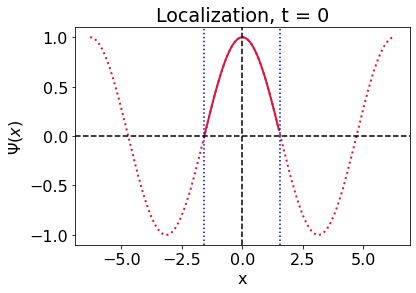

In [14]:
t = np.linspace(-2*np.pi, 2*np.pi, num=201, endpoint=True)
plt.plot(t, np.cos(t), color='crimson', lw=2, ls=':')
plt.plot(t[75:125], np.cos(t[75:125]), color='crimson', lw=2)
plt.axhline(0, color='k', ls='--')
plt.axvline(0, color='k', ls='--')
plt.axvline(-np.pi/2, color='mediumblue', ls=':')
plt.axvline(np.pi/2, color='mediumblue', ls=':')
plt.xlabel('x')
plt.ylabel(r"$\Psi(x)$")
plt.title('Localization, t = 0')

### $\frac{1}{2} \Delta k x_2 - \frac{1}{2} \Delta k x_1 = \pi$

### $\Delta k \Delta x = 2 \pi$

And, $k = \frac{2 \pi}{\lambda} = \frac{2 \pi}{h/p}$ from de Broglie, so

#### $k = p \frac{2 \pi}{h} = \frac{p}{\hbar}$

### $\Delta x \Delta p \geq \frac{\hbar}{2}$ (we lose the 2$\pi$ going from cosine to Gaussian)

### AND we have an uncertainty on energy too: 

#### $\Delta \omega \Delta t = 2 \pi$ from Equation (2), given constant $x$. Replacing the cosine envelope with a Gaussian we get  $\Delta \omega \Delta t = \frac{1}{2}$

### $E = h \nu \longrightarrow \Delta E = h \Delta \nu = h \frac{\Delta \omega}{2 \pi} = \hbar \Delta \omega$

### $\Delta E \Delta t \geq \frac{\hbar}{2}$